<a href="https://colab.research.google.com/github/bruno353/Data_Science_Projects/blob/main/Projeto_Portf%C3%B3lio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projeto de Portfólio
Dataset:https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

Uma revendedora deseja criar um modelo de Machine Learning que preveja valores de automóveis usados da marca Audi.

1- Principais insights e correlações sobre as features e o preço do carro ?

2 - Qual acurácia do modelo criado para predizer os valores ?

###Extração e manipulação dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('audi.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
engineSize,0,0.0
mpg,0,0.0
tax,0,0.0
fuelType,0,0.0
mileage,0,0.0
transmission,0,0.0
price,0,0.0
year,0,0.0
model,0,0.0


os dados não possuem Na

In [5]:
for col in df:
  print(f'{col}: {df[col].unique()}')

model: [' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
year: [2017 2016 2019 2015 2014 2018 2013 2020 2004 2009 2012 2010 2007 2011
 2008 2003 2005 2002 2006 1998 1997]
price: [12500 16500 11000 ... 21291 12380  3750]
transmission: ['Manual' 'Automatic' 'Semi-Auto']
mileage: [15735 36203 29946 ...  4018  1978  8646]
fuelType: ['Petrol' 'Diesel' 'Hybrid']
tax: [150  20  30 145 125 200   0 205 160 235 260 325 300 165 240 565 265 135
 570 555 140 330 305 155 580 290 195 115 295 220 230 280 315 535 190 540
 515]
mpg: [ 55.4  64.2  67.3  49.6  58.9  61.4  70.6  60.1  57.6  52.3  53.3  56.5
  47.1  47.9  62.8  76.3  51.4  65.7  68.9  50.4  72.4  38.7  74.3  42.8
  83.1  57.7  54.3  40.4  44.1  33.2  42.2  44.8  48.7  37.7  35.8  40.9
  45.6  34.   29.4  39.8  39.2  41.5  38.2  32.1  30.7  34.9  43.5  36.2
  30.1  32.8  29.7  26.4  33.6  34.5  46.3  37.2  80.7  28.8  31.7  32

In [6]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [32]:
df.groupby('model')['model'].agg('count').sort_values(ascending = False)

model
 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

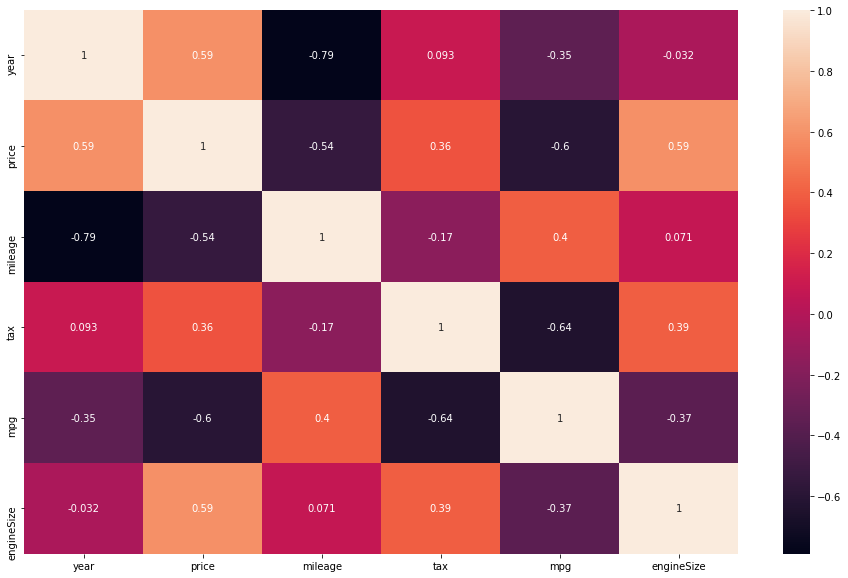

In [7]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)

O preço tem boas correlações com todas as features

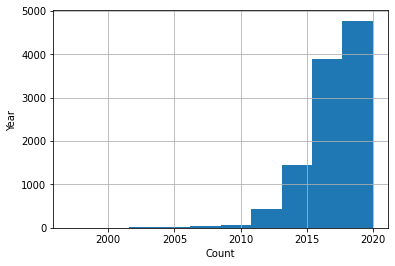

In [23]:
plt.ylabel('Year ')
plt.xlabel('Count')
df.year.hist()

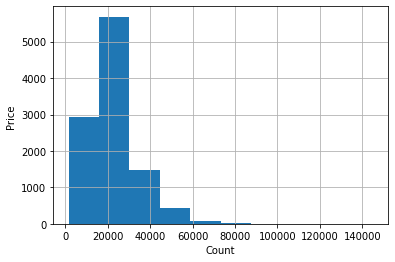

In [22]:
plt.ylabel('Price ')
plt.xlabel('Count')
df.price.hist()

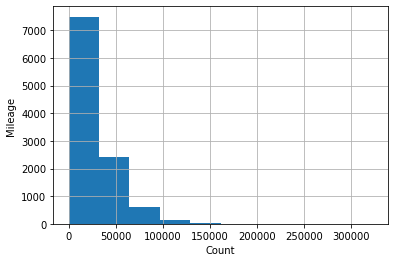

In [21]:
plt.ylabel('Mileage ')
plt.xlabel('Count')
df.mileage.hist()

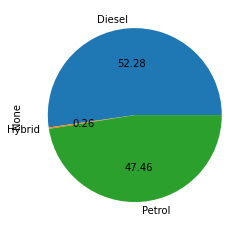

In [20]:
df.groupby('fuelType').size().plot(kind='pie', autopct='%.2f')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


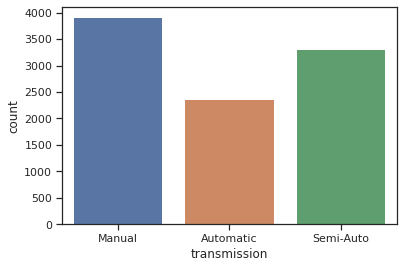

In [83]:
sns.countplot(df['transmission'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


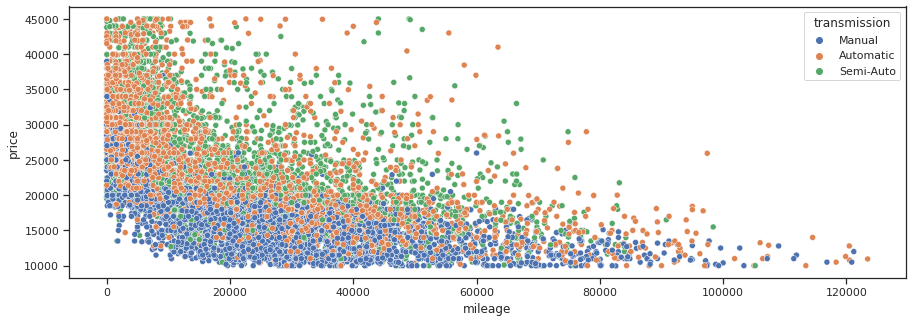

In [84]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(df["mileage"], df["price"], hue = df["transmission"])

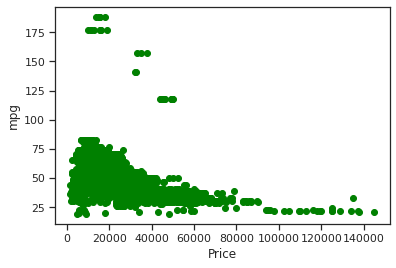

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('Price')
plt.ylabel('mpg')
plt.scatter(df.price,df.mpg, color = 'green')

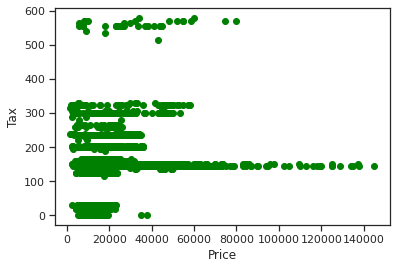

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('Price')
plt.ylabel('Tax')
plt.scatter(df.price,df.tax, color = 'green')

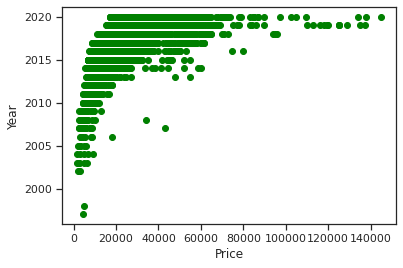

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('Price')
plt.ylabel('Year')
plt.scatter(df.price,df.year, color = 'green')

###Pré-Processamento e Modelagem

Retirando os outliers, usaremos a técnica estatística de quantile:

In [43]:
df.shape

(10668, 9)

In [44]:
#quero tirar valores em que o quantile seja menor que 0.05 e maior que 0.95
min_thresold, max_thresold = df.price.quantile([0.05, 0.95])
min_thresold, max_thresold
df = df[(df.price<max_thresold) & (df.price>min_thresold)]
df.shape

(9597, 9)

Lidando com variáveis categóricas:

In [45]:
df1 = pd.get_dummies(df, drop_first=True)

In [46]:
df1.head()

,year,price,mileage,tax,mpg,engineSize,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [49]:
df1.dtypes

year                        int64
price                       int64
mileage                     int64
tax                         int64
mpg                       float64
engineSize                float64
model_ A3                   uint8
model_ A4                   uint8
model_ A5                   uint8
model_ A6                   uint8
model_ A7                   uint8
model_ A8                   uint8
model_ Q2                   uint8
model_ Q3                   uint8
model_ Q5                   uint8
model_ Q7                   uint8
model_ R8                   uint8
model_ RS3                  uint8
model_ RS4                  uint8
model_ RS5                  uint8
model_ RS6                  uint8
model_ RS7                  uint8
model_ S3                   uint8
model_ S4                   uint8
model_ S5                   uint8
model_ S8                   uint8
model_ SQ5                  uint8
model_ SQ7                  uint8
model_ TT                   uint8
transmission_M

Modelagem:

In [51]:
Y = df1.price
X = df1.drop('price', axis = 1)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [63]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)

Modelo Linear:
87% de acurácia

In [64]:
#importando biblioteca sklearn:
from sklearn.linear_model import LinearRegression

	#instanciando o objeto do modelo:
modelo_linear = LinearRegression()
	
	#fit no modelo:
modelo_linear.fit(X_train, y_train)
modelo_linear.score(X_test,y_test)

0.8713376212091057

Modelo RandomForest:
93.7% de acurácia

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9370313047631191

Modelo Xgboost: 93.1% de acurácia

In [67]:
from xgboost import XGBRegressor


my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

[12:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [68]:
my_model.score(X_test,y_test)

0.9317940135011484

FEATURES E SEUS PESOS NO MODELO CRIADO:

Quais Features impactam mais no modelo ?

In [81]:
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state=1)
my_model = RandomForestRegressor(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.5295 ± 0.0258,year
0.3230 ± 0.0257,engineSize
0.2625 ± 0.0145,mpg
0.0741 ± 0.0062,mileage
0.0302 ± 0.0027,tax
0.0292 ± 0.0029,fuelType_Petrol
0.0217 ± 0.0036,transmission_Manual
0.0202 ± 0.0024,model_ Q5
0.0087 ± 0.0013,model_ A3
0.0074 ± 0.0017,model_ A4


###Conclusão

Com o modelo de RandomForest se conseguiu uma acurácia de 93.7%, representando um eficácia muito boa e estável para a predição dos valores de carros Audi.

As variáveis com mais influência no preço final foram: Ano, EngineSize e mpg.

A visualização gráfica trouxe diversos insights sobre as correlações entre features e as combinações que mais elevam o preço do carro.

